<h1 align='center'>COVID-19 RISK ASSESSMENT SYSTEM</h1>

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# IMPORTING IMPORTANT LIBRARIES.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## IMPORTING DATASET USING PANDAS.

In [ ]:
# read the dataset using pandas and store it as a dataframe.
covid_df = pd.read_csv("/gdrive/MyDrive/Covid Prediction AI Project/Covid prediction data.csv")
covid_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


### PRINTING ALL THE COLUMNS IN THE DATASET

In [ ]:
covid_df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

## GET SOME SOME INFORMATION ABOUT THE DATASET.

In [ ]:
# By using df.info() method you can get basic information about the dataset.
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


## CHECKING MISSING VALUES IN THE DATASET.

In [ ]:
# Check is there any missing values in the dataset
covid_df.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

### There is no missing values in the dataset

## EXPLORATORY DATA ANALYSIS
Let's explore each column and find some insights from them.

### 1.Cough

In [ ]:
covid_df.cough.value_counts()

0       121649
0       114719
1        25875
1        16353
None       252
Name: cough, dtype: int64

It shows two 0's and 1's because one is integer type and another string type.

### Change string type values to integer type values

In [ ]:
#change string type into numerical type using pd.to_numeric() function
covid_df.cough = pd.to_numeric(covid_df.cough, errors='coerce')

### See how many persons have cough/not cough

In [ ]:
cough_count = covid_df.cough.value_counts()
cough_count

0.0    236368
1.0     42228
Name: cough, dtype: int64

## Visualize the above information using bar graph

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

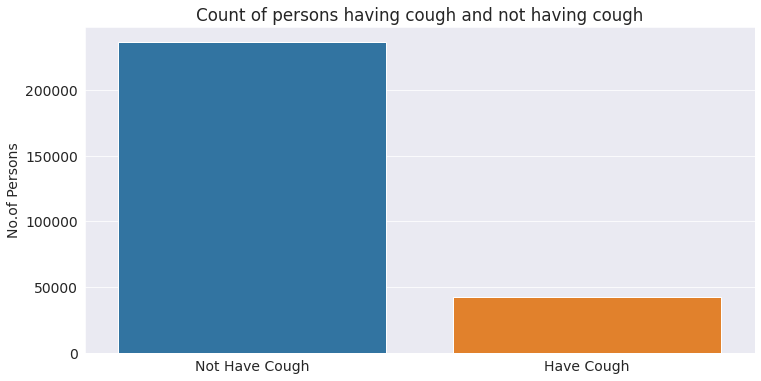

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Not Have Cough','Have Cough'],y=cough_count);
plt.title('Count of persons having cough and not having cough')
plt.ylabel('No.of Persons');



### **It appears that more than 200000 persons not having cough.**

## Compare cough with corona result.

In [ ]:
covid_df.corona_result.value_counts()

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [ ]:
# filtering the dataframe by the persons who are all having cough symptom.
corona_result_positive_with_cough = covid_df[covid_df.cough==1.0]


In [ ]:
# take the count of positive and negative in corona result where cough equal to 1
corona_result_positive_with_cough_count=corona_result_positive_with_cough.corona_result.value_counts() 

## Visualize the above information using piechart


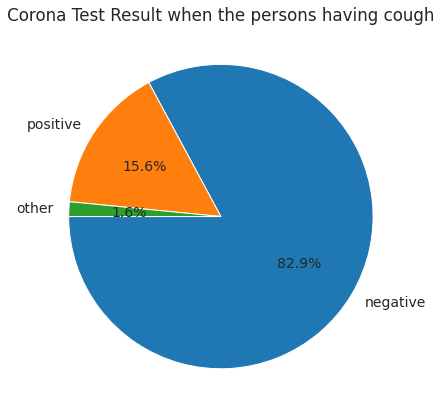

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_cough_count,labels=corona_result_positive_with_cough_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons having cough');


### **It appears that more than 80% of the people have test result negative with cough. It also indicates that if the person had a cough it does not means that person has a covid-19.**

# 2. Fever

In [ ]:
covid_df.fever.value_counts()

0       133942
0       122902
1        13582
1         8170
None       252
Name: fever, dtype: int64

In [ ]:
covid_df.fever = pd.to_numeric(covid_df.fever, errors='coerce')

In [ ]:
# get the count of the persons have fever / not have fever.
fever_count = covid_df.fever.value_counts()

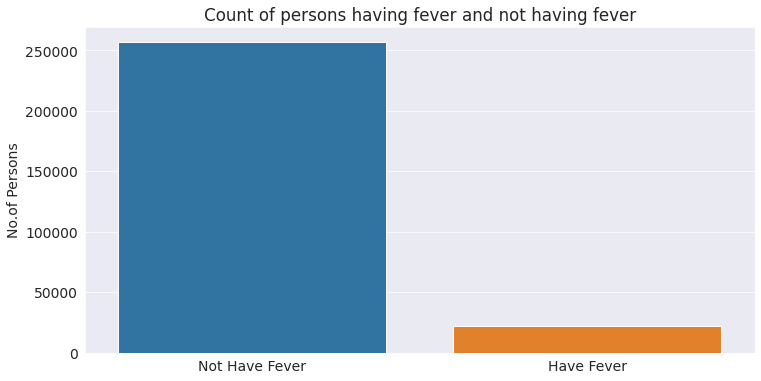

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Not Have Fever','Have Fever'],y=fever_count);
plt.title('Count of persons having fever and not having fever')
plt.ylabel('No.of Persons');



### **It appears that less than 50000 peoples having the fever.**

## Compare fever with corona result

In [ ]:
# Instead of writing the same code again and again, I created a function that filter the columns based on the condition.
def compare_with_result(col):
  temp = covid_df[(covid_df[col]==1.0) |(covid_df[col]=='Yes')]
  temp_count=temp.corona_result.value_counts()
  return  temp_count

In [ ]:
# get the count of the positive, negative result where the persons having fever.
corona_result_positive_with_fever_count=compare_with_result('fever')

## Visualize the above information using pie chart.

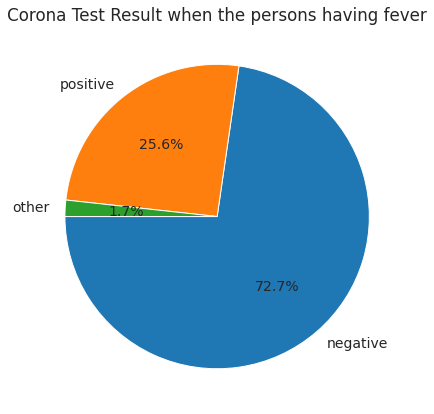

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_fever_count,labels=corona_result_positive_with_fever_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons having fever');


### **It appers that more than 25% percent of the people have positive result when they have fever.**

# 3. Sore Throat

In [ ]:
covid_df.sore_throat.value_counts()

0       260664
0        16257
1         1480
1          446
None         1
Name: sore_throat, dtype: int64

In [ ]:
#count of persons having sore throat and not have sore throat.
covid_df.sore_throat = pd.to_numeric(covid_df.sore_throat,errors='coerce')
sorethroat_count = covid_df.sore_throat.value_counts()
sorethroat_count

0.0    276921
1.0      1926
Name: sore_throat, dtype: int64

## Visualize the above information using bar chart.

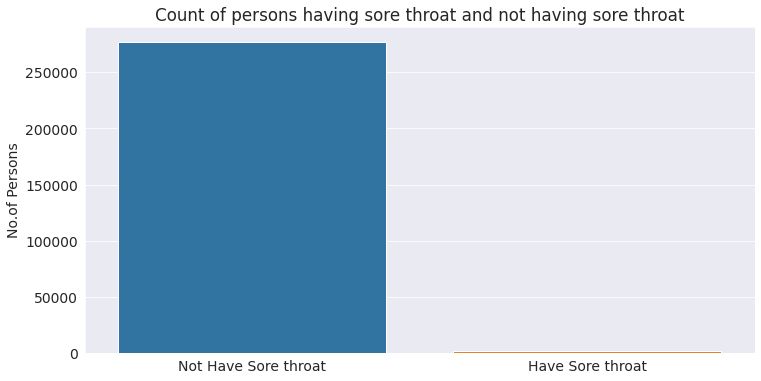

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Not Have Sore throat','Have Sore throat'],y=sorethroat_count);
plt.title('Count of persons having sore throat and not having sore throat')
plt.ylabel('No.of Persons');



### **It appears that very less no. of peoples having the symptom of sore throat.**

## Compare Sore throat with corona result.

In [ ]:
# count of positive and negative results when the person has sore throat.
corona_result_positive_with_sorethroat_count=compare_with_result('sore_throat')

## Visualize the above information using pie chart.

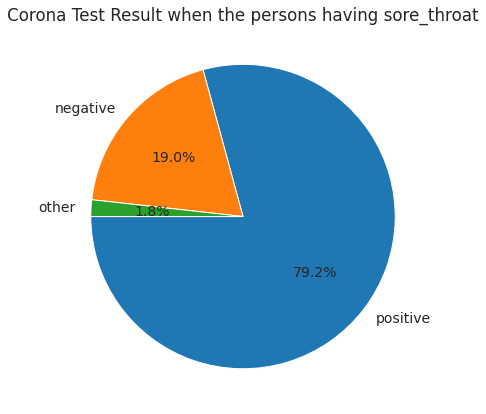

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_sorethroat_count,labels=corona_result_positive_with_sorethroat_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons having sore_throat');


### **It appears that more than 79.2 % of people tested positive when they have sore throat. So it is one of the great indicators of covid-19.**

# 4. Shortness of Breathing.

In [ ]:
covid_df.shortness_of_breath.value_counts()

0       261079
0        16191
1         1065
1          512
None         1
Name: shortness_of_breath, dtype: int64

In [ ]:
covid_df.shortness_of_breath = pd.to_numeric(covid_df.shortness_of_breath, errors='coerce')

In [ ]:
# count of person having shortness of breathing and not having shortness of breathing.
breathe_count = covid_df.shortness_of_breath.value_counts()

## Visualize the above information using bar chart.

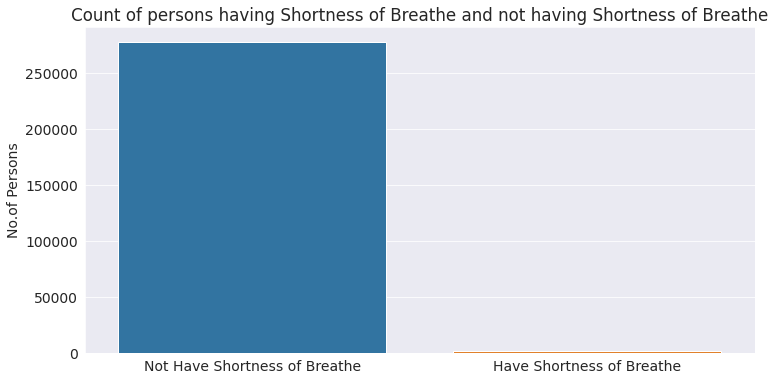

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Not Have Shortness of Breathe','Have Shortness of Breathe'],y=breathe_count);
plt.title('Count of persons having Shortness of Breathe and not having Shortness of Breathe')
plt.ylabel('No.of Persons');



## **It appears that very minimum amount of peoples having shortness of breathing problem.**

In [ ]:
# count of positive and negative results when the person has shortness of breathing.
corona_result_positive_with_shortness_of_breath_count=compare_with_result('shortness_of_breath')

## Visualize the above information using pie chart.

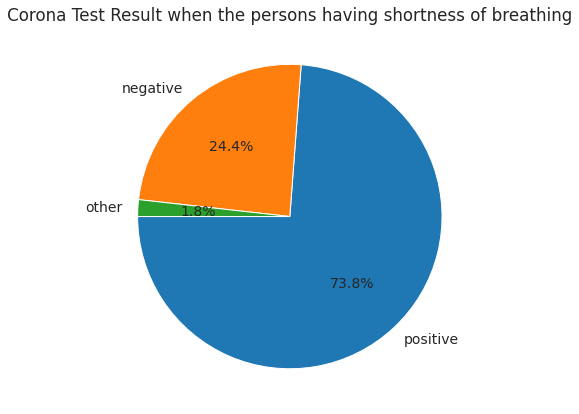

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_shortness_of_breath_count,labels=corona_result_positive_with_shortness_of_breath_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons having shortness of breathing');


### **It appears that more than 70% percent of the people tested positive when they have shortness of breathing problem. It is one of the great indicators of covid-19.**

# 5. Headache

In [ ]:
covid_df.head_ache.value_counts()

0       260079
0        16354
1         2065
1          349
None         1
Name: head_ache, dtype: int64

In [ ]:
# count of person having headache and not having headache.
covid_df.head_ache = pd.to_numeric(covid_df.head_ache,errors='coerce')
covid_df.head_ache.value_counts()

0.0    276433
1.0      2414
Name: head_ache, dtype: int64

## Compare headache with corona result.

In [ ]:
# count of positive and negative results when they person have headache.
corona_result_positive_with_head_ache_count=compare_with_result('head_ache')

## Visualize the above information using pie chart.

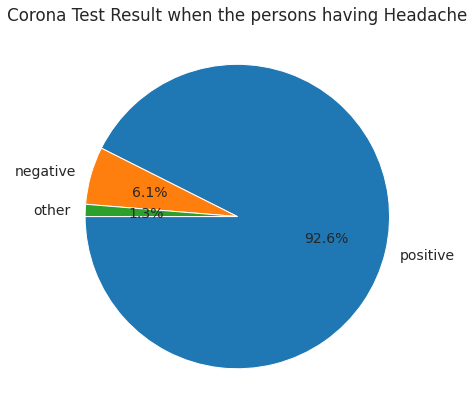

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_head_ache_count,labels=corona_result_positive_with_head_ache_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons having Headache');


### **It appears that more than 90% of the people tested positive when they have head_ache. It is one of the great indicators of covid-19.**

# 6. Age 60 and Above

In [ ]:
# count of persons who are older than the age 60 and above.
age60_count = covid_df.age_60_and_above.value_counts()

## Visualize the above information using bar chart.

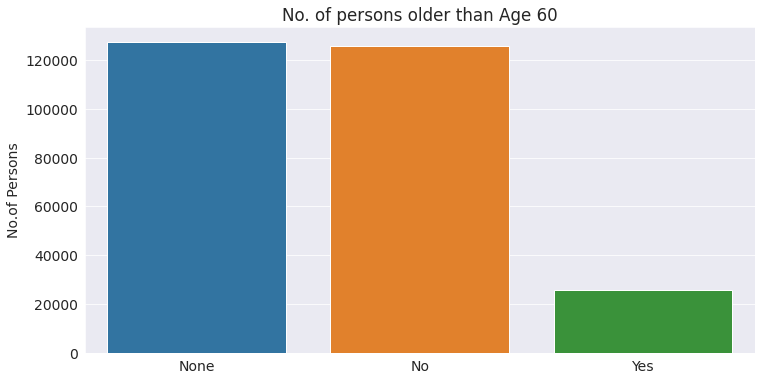

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=age60_count.index,y=age60_count);
plt.title('No. of persons older than Age 60')
plt.ylabel('No.of Persons');



### **It appears that more than 20000 of the people are older than age 60.**


In [ ]:
# count of positive and negative results when the person is older than the age 60.
corona_result_positive_with_above_age_60_count=compare_with_result('age_60_and_above')

## Visualize the above information using pie chart.

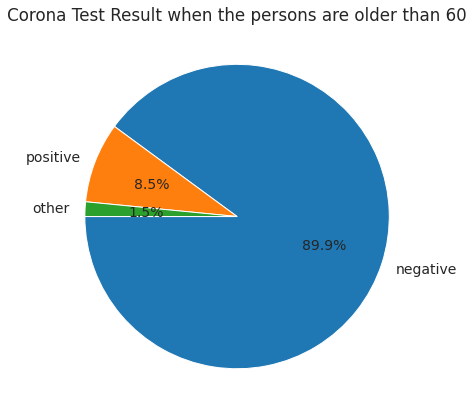

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_above_age_60_count,labels=corona_result_positive_with_above_age_60_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons are older than 60');


#### **It appers that close to 90% percent of people tested negative and only 8.5% percent of people tested positive. It indicates that covid-19 can attack the persons age older than 60 and age less than 60.**

# 7. Test Indication

In [ ]:
# count of the person when they recently came from abroad and contacted with other covid19 patient.
test_indication_count = covid_df.test_indication.value_counts()
test_indication_count

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: test_indication, dtype: int64

## Visualize the information using bar chart.

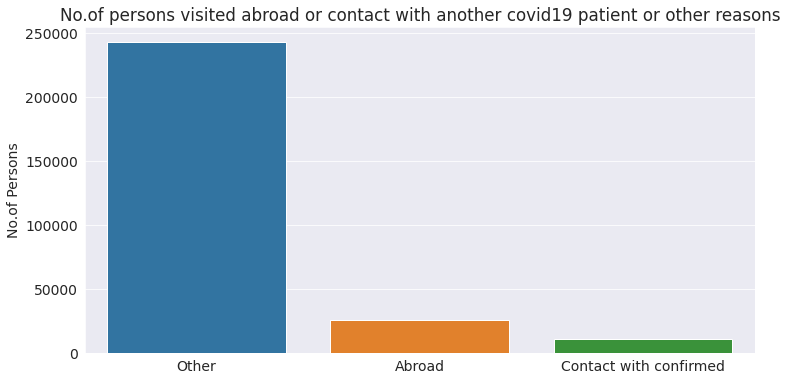

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=test_indication_count.index,y=test_indication_count);
plt.title('No.of persons visited abroad or contact with another covid19 patient or other reasons')
plt.ylabel('No.of Persons');



#### **It appears that more than 10000 persons contact with the covid patients and more than 25000 persons recently went abroad.**

## Compare test indication with corona result.

In [ ]:
# count of positive and negative results when the person contacted with another covid19 patient.
corona_result_positive_with_test_indication = covid_df[covid_df.test_indication=='Contact with confirmed']
corona_result_positive_with_test_indication_count=corona_result_positive_with_test_indication.corona_result.value_counts() 
corona_result_positive_with_test_indication_count

positive    7318
negative    3160
other        161
Name: corona_result, dtype: int64

## Visualize the above information using pie chart.

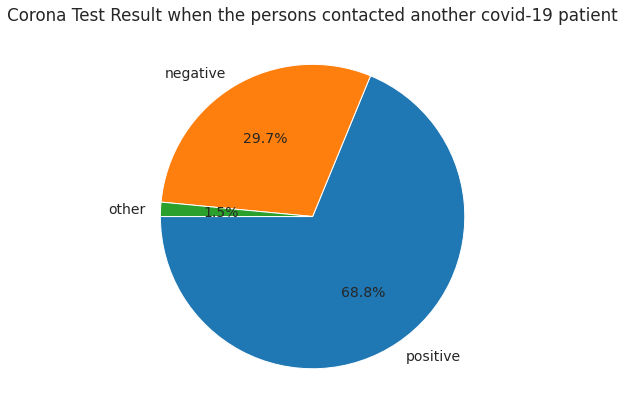

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_test_indication_count,labels=corona_result_positive_with_test_indication_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons contacted another covid-19 patient');


#### **The graph shows that more than 68% people tested positive when they contacted the covid-19 patient.**

In [ ]:
# count of positive and negative results when the person recently came from abroad.
corona_result_positive_with_test_indication = covid_df[covid_df.test_indication=='Abroad']
corona_result_positive_with_test_indication_count=corona_result_positive_with_test_indication.corona_result.value_counts() 
corona_result_positive_with_test_indication_count

negative    23205
positive     1869
other         394
Name: corona_result, dtype: int64

## Visualize the above information using pie chart.

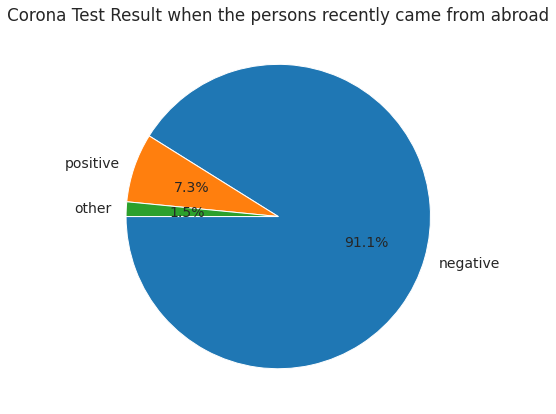

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_test_indication_count,labels=corona_result_positive_with_test_indication_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the persons recently came from abroad');


#### **The graph shows that more than 90% people tested negative and only 7.3% of people tested positive when they recently came from abroad.**

# 8. Gender

In [ ]:
# count of Male and Female
gender_count = covid_df.gender.value_counts()
gender_count

female    130158
male      129127
None       19563
Name: gender, dtype: int64

## Visualize the above information using bar chart.

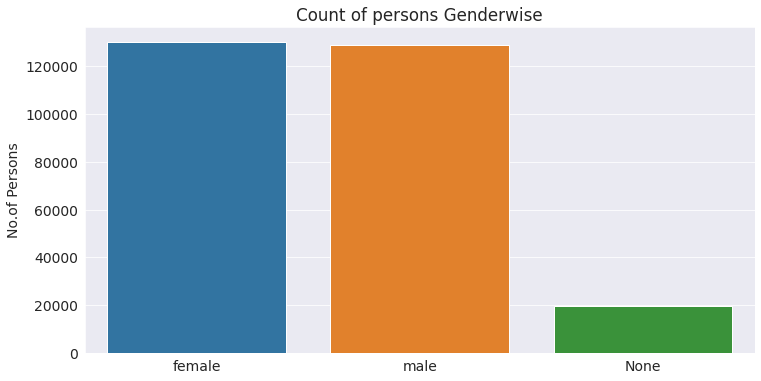

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=gender_count.index,y=gender_count);
plt.title('Count of persons Genderwise')
plt.ylabel('No.of Persons');



#### **The above graph shows that count of both the male and female are almost same.**

In [ ]:
# count of positive and negative results when the person is male.
corona_result_positive_with_male = covid_df[covid_df.gender=='male']
corona_result_positive_with_male_count=corona_result_positive_with_male.corona_result.value_counts() 
corona_result_positive_with_male_count

negative    119851
positive      7519
other         1757
Name: corona_result, dtype: int64

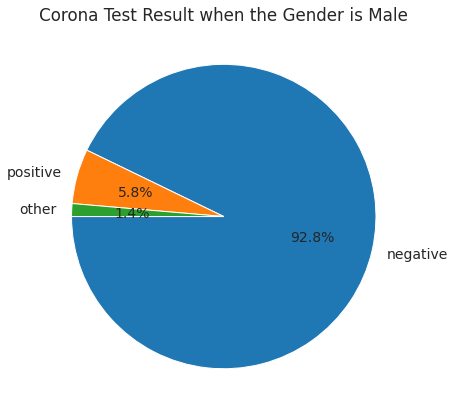

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_male_count,labels=corona_result_positive_with_male_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the Gender is Male');


#### **It appears that most of the men are tested negative**

In [ ]:
# count of positive and negative results when the person is female.
corona_result_positive_with_female = covid_df[covid_df.gender=='female']
corona_result_positive_with_female_count=corona_result_positive_with_female.corona_result.value_counts() 
corona_result_positive_with_female_count

negative    122500
positive      6041
other         1617
Name: corona_result, dtype: int64

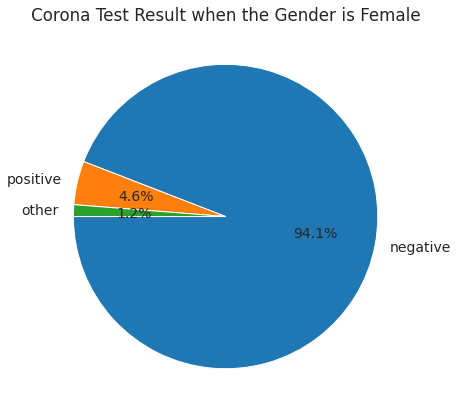

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_with_female_count,labels=corona_result_positive_with_female_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Corona Test Result when the Gender is Female');


#### **It appears that most of the women also tested negative.**

# **SOME INTERESTING QUESTIONS AND SOME MEANINGFUL INSIGHTS.**

# 1. Covid19 Result when the person have symptoms of sore_throat, shortness of breathe, headache and contacted with another covid patient.

In [ ]:
corona_result_positive_1 = covid_df[(covid_df.sore_throat==1.0) & (covid_df.shortness_of_breath==1.0) & (covid_df.head_ache==1.0)]
corona_result_positive_1_count=corona_result_positive_1.corona_result.value_counts() 
corona_result_positive_1_count

positive    148
negative     19
other         2
Name: corona_result, dtype: int64

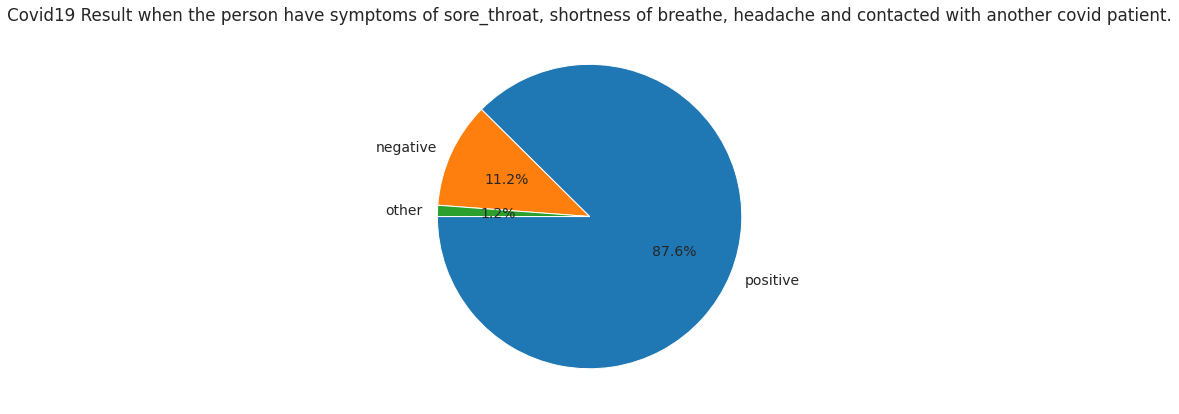

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_1_count,labels=corona_result_positive_1_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of sore_throat, shortness of breathe, headache and contacted with another covid patient.');


#### **It appears that nearly 87% percentage of people tested positive when they have symptoms of sore_throat, shortness of breathe, headache and contacted with another covid patient.**



# 2. Covid19 Result when the person have symptoms of sore_throat, shortness of breathe, headache and recently came from abroad.

In [ ]:
corona_result_positive_7 = covid_df[(covid_df.sore_throat==1.0) & (covid_df.shortness_of_breath==1.0) & (covid_df.head_ache==1.0) & (covid_df.test_indication=='Abroad')]
corona_result_positive_7_count=corona_result_positive_7.corona_result.value_counts() 
corona_result_positive_7_count

positive    24
negative     2
Name: corona_result, dtype: int64

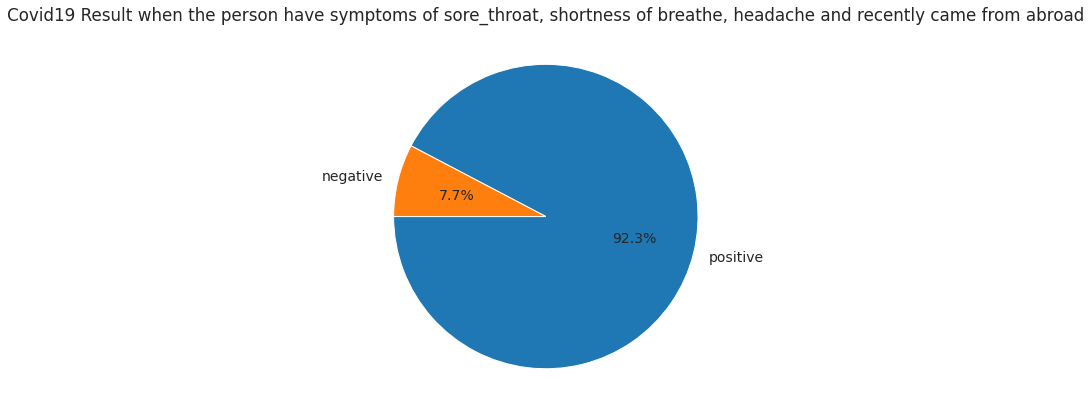

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_7_count,labels=corona_result_positive_7_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of sore_throat, shortness of breathe, headache and recently came from abroad');


#### **It appears that more than 90% percentage of people tested positive when they have symptoms of sore_throat, shortness of breathe, headache and recently came from abroad.**

# 3. Covid19 Result when the person have symptoms of cough, fever, head_ache.

In [ ]:
corona_result_positive_2 = covid_df[(covid_df.head_ache==1.0) & (covid_df.cough==1.0) & (covid_df.fever==1.0)]
corona_result_positive_2_count=corona_result_positive_2.corona_result.value_counts() 
corona_result_positive_2_count

positive    850
negative     49
other        10
Name: corona_result, dtype: int64

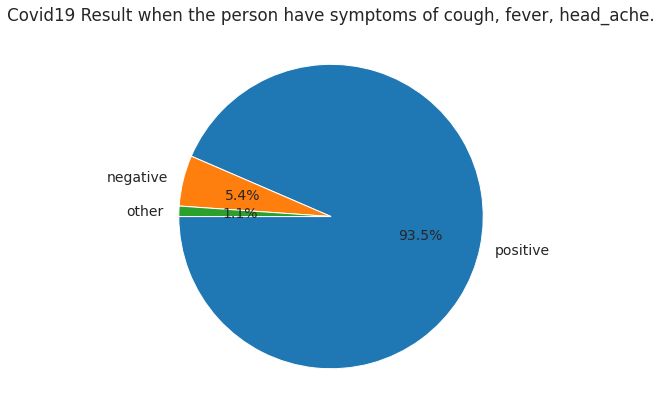

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_2_count,labels=corona_result_positive_2_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of cough, fever, head_ache.');


#### **It appears that nearly 93% percentage of people tested positive when they have symptoms of cough, fever, head_ache.**

# 4. Covid19 Result when the person have symptoms of cough, fever.

In [ ]:
corona_result_positive_3 = covid_df[(covid_df.cough==1.0) & (covid_df.fever==1.0)]
corona_result_positive_3_count=corona_result_positive_3.corona_result.value_counts() 
corona_result_positive_3_count

negative    11649
positive     3552
other         274
Name: corona_result, dtype: int64

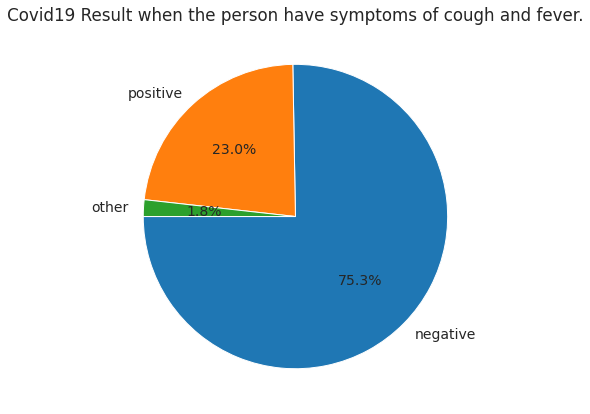

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_3_count,labels=corona_result_positive_3_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of cough and fever.');


#### **It appears that nearly 75% percentage of people tested negative when they have symptoms of cough and fever only.**

## 5. Covid19 Result when the person have symptoms of cough, fever, head_ache and he/she recently came from abroad.

In [ ]:
corona_result_positive_4 = covid_df[(covid_df.head_ache==1.0) & (covid_df.cough==1.0) & (covid_df.fever==1.0) & (covid_df.test_indication == 'Abroad')]
corona_result_positive_4_count=corona_result_positive_4.corona_result.value_counts() 
corona_result_positive_4_count

positive    112
negative     15
Name: corona_result, dtype: int64

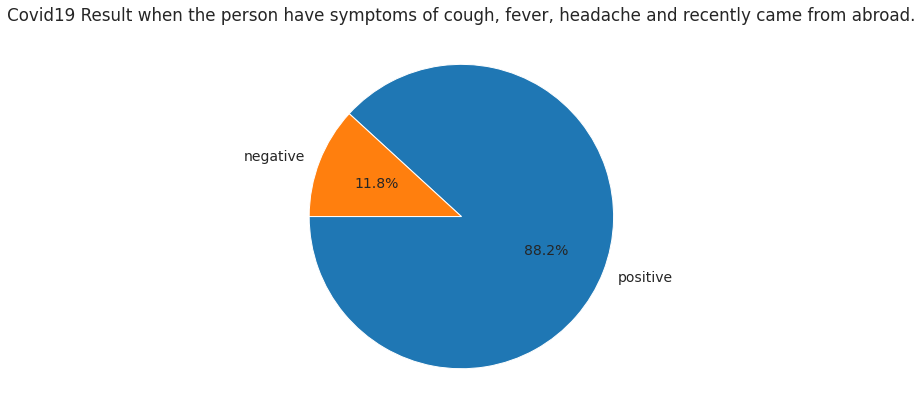

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_4_count,labels=corona_result_positive_4_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of cough, fever, headache and recently came from abroad.');


#### **The graph shows that more than 85% of people tested positive when they have symptoms of cough, fever, headache and recently came from abroad.**

# 6. Covid19 Result when the person have symptoms of cough, fever, head_ache, sore_throat, shortness_of_breathing.

In [ ]:
corona_result_positive_5 = covid_df[(covid_df.head_ache==1.0) & (covid_df.cough==1.0) & (covid_df.fever==1.0) & (covid_df.sore_throat==1.0) & (covid_df.shortness_of_breath==1.0)]
corona_result_positive_5_count=corona_result_positive_5.corona_result.value_counts() 
corona_result_positive_5_count

positive    89
negative     4
other        1
Name: corona_result, dtype: int64

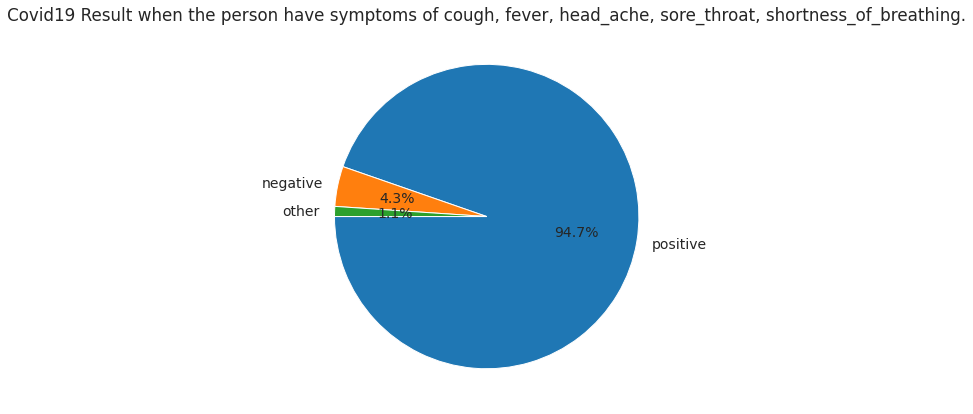

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_5_count,labels=corona_result_positive_5_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of cough, fever, head_ache, sore_throat, shortness_of_breathing.');


#### **It appears that more than 90% of people tested positive when they have symptoms of cough, fever, head_ache, sore_throat, shortness_of_breathing.**

# 7. Covid19 Result when the person have symptoms of cough, fever, head_ache and age is greater than or equal to 60

In [ ]:
corona_result_positive_6 = covid_df[(covid_df.head_ache==1.0) & (covid_df.cough==1.0) & (covid_df.fever==1.0) & (covid_df.age_60_and_above=='Yes')]
corona_result_positive_6_count=corona_result_positive_6.corona_result.value_counts() 
corona_result_positive_6_count

positive    129
negative      6
other         2
Name: corona_result, dtype: int64

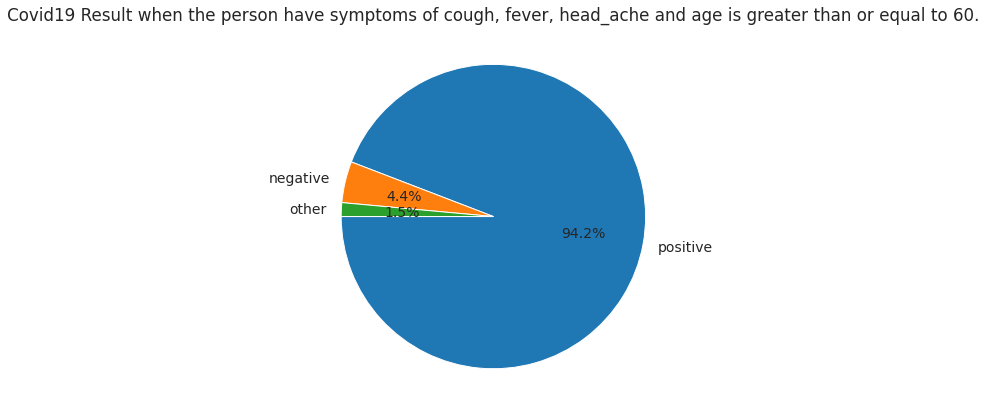

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_6_count,labels=corona_result_positive_6_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person have symptoms of cough, fever, head_ache and age is greater than or equal to 60.');


#### **It appears that more than 90% of people tested positive when they have symptoms of cough, fever, head_ache and age greater than or equal to 60.**

# 8. Covid19 Result when the person is older than 60 and  have symptoms of cough, fever and shortness of breathing. 

In [ ]:
corona_result_positive_7 = covid_df[(covid_df.shortness_of_breath==1.0) & (covid_df.cough==1.0) & (covid_df.fever==1.0) & (covid_df.age_60_and_above=='Yes')]
corona_result_positive_7_count=corona_result_positive_7.corona_result.value_counts() 
corona_result_positive_7_count

positive    128
negative      7
other         3
Name: corona_result, dtype: int64

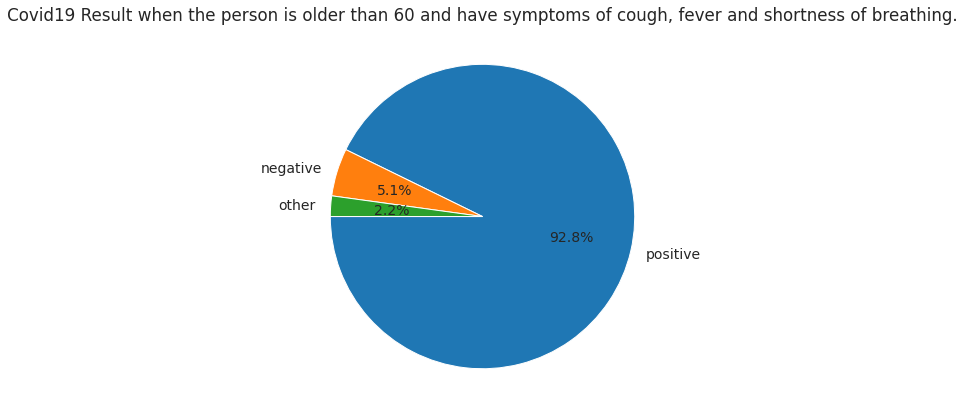

In [ ]:
plt.figure(figsize=(18,7))
plt.pie(corona_result_positive_7_count,labels=corona_result_positive_7_count.index,autopct='%1.1f%%',startangle=180)
plt.title('Covid19 Result when the person is older than 60 and have symptoms of cough, fever and shortness of breathing.');


#### **It appears that more than 92% of people older than 60 tested positive when they have symptoms of cough, fever and shortness of breathing.**

# **HYPOTHESIS TESTING**

Hypothesis Testing is a statistical method which is used to test our assumptions based on the Null and Alternate Hypothesis using P value or some statistical tests at particular significance value.

##In this analysis, I used Chisquare test and P value to test the Hypotheses.

In [ ]:
# import chi2_contigency from scipy.stats
from scipy.stats import chi2_contingency

In [ ]:
# created a function to find the observed values
def crosstab(col1,col2):
  obs = pd.crosstab(covid_df[col1],covid_df[col2])
  return obs.values

In [ ]:
# created a function to find the P value 
def chi2_pvalue(obs):
  test_stat, p_value, dof, expected_val = chi2_contingency(obs)
  return p_value

In [ ]:
# setting alpha value or significance value to 5%
alpha = 0.05

## 1. Conclude that there is a association between test indication and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature test indication and corona result. <br>
#### H1 : There is a relation between the feature test indication and corona result

In [ ]:
obs = crosstab('test_indication','corona_result')
obs

array([[ 23205,    394,   1869],
       [  3160,    161,   7318],
       [233862,   3337,   5542]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")


P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


####**There is a association between the test indication and covid19 result**

## 2. Conclude that there is a association between gender and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature gender and corona result. <br>
#### H1 : There is a relation between the feature gender and corona result

In [ ]:
obs = crosstab('gender','corona_result')
obs

array([[ 17876,    518,   1169],
       [122500,   1617,   6041],
       [119851,   1757,   7519]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")


P Value :  7.202913146151896e-97
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a association between the feature gender and corona result.**

## 3. Conclude that there is a association between Age above 60 and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature age above 60  and corona result.<br>
#### H1 : There is a relation between the feature age above 60 and corona result.

In [ ]:
obs = crosstab('age_60_and_above','corona_result')
obs

array([[114602,   1836,   9265],
       [122404,   1656,   3260],
       [ 23221,    400,   2204]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")


P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a association between the fetures age above 60 and corona result.**

## 4. Conclude that there is a association between headache and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature headache and corona result.
#### H1 : There is a relation between the feature headache and corona result.

In [ ]:
obs = crosstab('head_ache','corona_result')
obs

array([[260079,   3861,  12493],
       [   148,     31,   2235]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")


P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a association between the features headache and corona result.**

## 5. Conclude that there is a association between shortness of breathing and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature shortness of breathing and corona result. <br>
#### H1 : There is a relation between the feature shortness of breathing and corona result.

In [ ]:
obs = crosstab('shortness_of_breath','corona_result')
obs

array([[259842,   3864,  13564],
       [   385,     28,   1164]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")

P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a relation between the features shortness of breathing and corona result.**

## 6. Conclude that there is a association between sore throat and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature sore throat and corona result. 
#### H1 : There is a relation between the feature sore throat and corona result.

In [ ]:
obs = crosstab('sore_throat','corona_result')
obs

array([[259861,   3858,  13202],
       [   366,     34,   1526]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")

P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a relation between the feature sore throat and corona result.**

## 7. Conclude that there is a association between fever and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature fever and corona result.
#### H1 : There is a relation between the feature fever and corona result.

In [ ]:
obs = crosstab('fever','corona_result')
obs

array([[244192,   3515,   9137],
       [ 15816,    377,   5559]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")

P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a relation between the feature fever and corona result.**

## 8. Conclude that there is a association between fever and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature fever and corona result. <br>
#### H1 : There is a relation between the feature fever and corona result.

In [ ]:
obs = crosstab('fever','corona_result')
obs

array([[244192,   3515,   9137],
       [ 15816,    377,   5559]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")

P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a relation between the feature fever and corona result.**

## 9. Conclude that there is a association between cough and corona result feature with Hypothesis Testing using chi square test.

#### H0 : There is no relation between the feature cough and corona result.<br>
#### H1 : There is a relation between the feature cough and corona result.

In [ ]:
obs = crosstab('cough','corona_result')
obs


array([[225021,   3235,   8112],
       [ 34987,    657,   6584]])

In [ ]:
p_value = chi2_pvalue(obs)
if p_value <= alpha:
  print('P Value : ',p_value)
  print('Reject Null Hypothesis and Accept Alternate Hypothesis')

else:
  print('P Value : ',p_value)
  print("Accept Null Hypothesis and Reject Alternate Hypothesis")

P Value :  0.0
Reject Null Hypothesis and Accept Alternate Hypothesis


#### **There is a relation between the feature cough and corona result.**

# **RESULTS**
#### Let's Summarize the results from the Analysis.

**FROM EXPLORATORY DATA ANALYSIS ON INDIVIDUAL COLUMNS**
*   It appears that more than 200000 persons not having cough.
*   It appears that more than 80% of the people have test result negative with cough. It also indicates that if the person had a cough it does not means that person has a covid-19.
*   It appears that less than 50000 peoples having the fever.
*   It appers that more than 25% percent of the people have positive result when they have fever.
*   It appears that very less no. of peoples having the symptom of sore throat.
*   It appears that more than 79.2 % of people tested positive when they have sore throat. So it is one of the great indicators of covid-19.
*   It appears that very minimum amount of peoples having shortness of breathing problem.
*   It appears that more than 70% percent of the people tested positive when they have shortness of breathing problem. It is one of the great indicators of covid-19.
*   It appears that more than 90% of the people tested positive when they have head_ache. It is one of the great indicators of covid-19.
*   It appears that more than 20000 of the people are older than age 60.
*   It appers that close to 90% percent of people tested negative and only 8.5% percent of people tested positive. It indicates that covid-19 can attack the persons age older than 60 and age less than 60.
*   The graph shows that more than 68% people tested positive when they contacted the covid-19 patient.
*   It appears that more than 10000 persons contact with the covid patients and more than 25000 persons recently went abroad.
*   The above graph shows that count of both the male and female are almost same.
*   It appears that most of the men are tested negative.
*   It appears that most of the Women are tested negative.

**FROM THE QUESTIONS ASKED**
*   It appears that nearly 87% percentage of people tested positive when they have symptoms of sore_throat, shortness of breathe, headache and contacted with another covid patient.
*   It appears that more than 90% percentage of people tested positive when they have symptoms of sore_throat, shortness of breathe, headache and recently came from abroad.
*   It appears that nearly 93% percentage of people tested positive when they have symptoms of cough, fever, head_ache.
*   It appears that nearly 75% percentage of people tested negative when they have symptoms of cough and fever only.
*   The graph shows that more than 85% of people tested positive when they have symptoms of cough, fever, headache and recently came from abroad.
*   There is a relation between the feature sore throat and corona result.
*   It appears that more than 90% of people tested positive when they have symptoms of cough, fever, head_ache and age greater than or equal to 60.
*   It appears that more than 92% of people older than 60 tested positive when they have symptoms of cough, fever and shortness of breathing.

**FROM HYPOTHESIS TESTING**





